# 图像处理

In [34]:
import numpy as np
import cupy as cp
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

## 1. 图像负片效果

In [35]:
image_reverse = cp.ElementwiseKernel(
    'T src,T y','T z','''
        z = y - src
    ''','image_reverse'
    )

In [36]:
src = cv2.cvtColor(cv2.imread('../../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
src2 = cv2.cvtColor(cv2.imread('../../datas/f1.jpg'),cv2.COLOR_BGR2RGB)

In [37]:
res = image_reverse(cp.asarray(src),255).get()

Text(0.5,1,'DST')

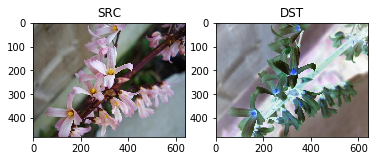

In [38]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(res)
plt.title('DST')

## 2. 图像相加

In [39]:
image_add = cp.ElementwiseKernel(
    'T x,T y','T z','''
        z = x + y;
    ''','image_add'
    )
image_add_weighted = cp.ElementwiseKernel(
    'T x,T alpha,T y,T beta','T z','''
        z = alpha * x + beta * y
    ''','image_add_weighted'
    )

In [40]:
res1 = image_add(cp.asarray(src).astype('f'),cp.asarray(src2).astype('f')).get()
res2 = image_add_weighted(cp.asarray(src).astype('f'),0.55,cp.asarray(src2).astype('f'),0.45).get()

In [41]:
def convertScaleAbs(x):
    res = x.copy()
    res[x < 0] = 0
    res[x > 255] = 255
    res = np.uint8(np.abs(res))
    return res

Text(0.5,1,'Image Add Weighted')

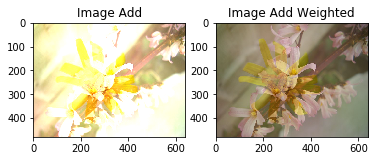

In [42]:
plt.subplot(121)
plt.imshow(convertScaleAbs(res1))
plt.title('Image Add')
plt.subplot(122)
plt.imshow(convertScaleAbs(res2))
plt.title('Image Add Weighted')

In [43]:
def img_add(src1,src2):
    dst = src1 + src2
    return dst

def img_add_weighted(src1,alpha,src2,beta):
    dst = alpha * src1 + beta * src2
    return dst

In [44]:
res1 = img_add(cp.asarray(src).astype('f'),cp.asarray(src2).astype('f')).get()
res2 = img_add_weighted(cp.asarray(src).astype('f'),0.55,cp.asarray(src2).astype('f'),0.45).get()

Text(0.5,1,'Image Add Weighted')

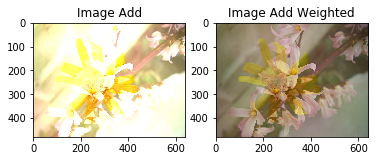

In [45]:
plt.subplot(121)
plt.imshow(convertScaleAbs(res1))
plt.title('Image Add')
plt.subplot(122)
plt.imshow(convertScaleAbs(res2))
plt.title('Image Add Weighted')

## 2. 图像相减

In [46]:
image_sub = cp.ElementwiseKernel(
    'T x,T y','T z','''
        z = x - y;
    ''','image_add'
    )

Text(0.5,1,'Image Sub.')

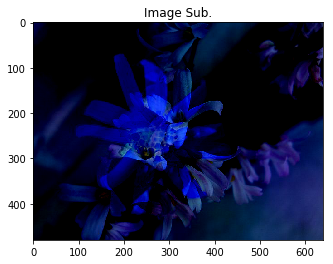

In [47]:
res1 = image_sub(cp.asarray(src).astype('f'),cp.asarray(src2).astype('f')).get()
plt.imshow(convertScaleAbs(res1))
plt.title('Image Sub.')

## 3. 图像翻转

In [50]:
flipLR = cp.fliplr(cp.asarray(src)).get()
flipUD = cp.flipud(cp.asarray(src)).get()

Text(0.5,1,'Flip Up Down')

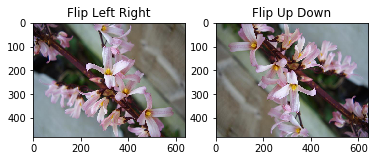

In [51]:
plt.subplot(121)
plt.imshow(convertScaleAbs(flipLR))
plt.title('Flip Left Right')
plt.subplot(122)
plt.imshow(convertScaleAbs(flipUD))
plt.title('Flip Up Down')